In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

def fetch_options_data(stock_symbol):
    session = requests.Session()
    
    url = f'https://www.nseindia.com/api/option-chain-indices?symbol={stock_symbol}'
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Referer': 'https://www.nseindia.com/',
        'X-Requested-With': 'XMLHttpRequest',
    }

    response = session.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        
        # Print the entire response to inspect its structure
        print("Raw response data:", data)  # Print the raw JSON response
        
        if 'records' in data and 'data' in data['records']:
            if len(data['records']['data']) > 0:
                calls_data = []
                puts_data = []

                # Loop through the data to extract calls and puts
                for option in data['records']['data']:
                    strike_price = option['strikePrice']
                    expiry_date = option['expiryDate']
                    
                    # Check for Call options (CE)
                    if 'CE' in option:
                        calls_data.append({
                            'strikePrice': strike_price,
                            'expiryDate': expiry_date,
                            **option['CE']
                        })
                    
                    # Check for Put options (PE)
                    if 'PE' in option:
                        puts_data.append({
                            'strikePrice': strike_price,
                            'expiryDate': expiry_date,
                            **option['PE']
                        })
                
                # Create DataFrames
                calls_df = pd.DataFrame(calls_data) if calls_data else pd.DataFrame()
                puts_df = pd.DataFrame(puts_data) if puts_data else pd.DataFrame()

                return calls_df, puts_df
            else:
                print("No options data available for the specified symbol.")
                return None, None
        else:
            print("No 'records' or 'data' found in response.")
            return None, None
    else:
        print(f"Failed to retrieve data: {response.status_code} - {response.text}")
        return None, None

# Function to calculate implied volatility skew
def calculate_volatility_skew(calls_df, puts_df):
    # Create DataFrames for calls and puts
    calls_data = calls_df[['strikePrice', 'expiryDate', 'impliedVolatility']]
    puts_data = puts_df[['strikePrice', 'expiryDate', 'impliedVolatility']]
    
    return calls_data, puts_data

# Function to plot volatility skew
def plot_volatility_skew(df, option_type):
    plt.figure(figsize=(10, 6))
    for expiry in df['expiryDate'].unique():
        subset = df[df['expiryDate'] == expiry]
        plt.plot(subset['strikePrice'], subset['impliedVolatility'], label=f'Expiry: {expiry}')
    plt.title(f'Volatility Skew for {option_type}')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid()
    plt.show()

# Function to compare current and baseline skews
def compare_skews(baseline_skew, current_skew, threshold):
    significant_changes = []
    
    for strike in current_skew['strikePrice']:
        current_iv = current_skew[current_skew['strikePrice'] == strike]['impliedVolatility'].values[0]
        baseline_iv = baseline_skew[baseline_skew['strikePrice'] == strike]['impliedVolatility'].values[0]
        
        if abs(current_iv - baseline_iv) > threshold:
            significant_changes.append((strike, current_iv, baseline_iv))

    return significant_changes

# Function to alert significant changes
def alert_significant_changes(changes):
    for strike, current, baseline in changes:
        print(f"Alert: Significant change detected for strike {strike}. "
              f"Current IV: {current}, Baseline IV: {baseline}")

# Function to implement risk adjustments
def adjust_positions_based_on_changes(significant_changes):
    for strike, current_iv, baseline_iv in significant_changes:
        print(f"Considering adjustments for strike {strike}.")
        # Implement logic for hedging or reducing positions here

# Main execution logic
if __name__ == "__main__":
    stock_symbol = "NIFTY"
    
    # Fetch options data
    calls, puts = fetch_options_data(stock_symbol)

    if calls is not None and puts is not None:
        # Remove zero IV from the DataFrames
        filtered_calls = calls[calls['impliedVolatility'] > 0]
        filtered_puts = puts[puts['impliedVolatility'] > 0]

        # Calculate skew for calls and puts
        calls_data, puts_data = calculate_volatility_skew(filtered_calls, filtered_puts)

        # Plot skews
        plot_volatility_skew(calls_data, 'Calls')
        plot_volatility_skew(puts_data, 'Puts')

        # Assuming you have a function to fetch the baseline skew
        baseline_calls = calls_data  # Replace with actual baseline skew fetching logic
        baseline_puts = puts_data  # Replace with actual baseline skew fetching logic

        # Fetch current skews (you can implement a timer or scheduling for this)
        current_calls = calls_data  # Replace with actual current skew fetching logic
        current_puts = puts_data  # Replace with actual current skew fetching logic

        # Set a threshold for significant changes
        threshold = 0.05  # Example: 5%

        # Compare skews
        significant_call_changes = compare_skews(baseline_calls, current_calls, threshold)
        significant_put_changes = compare_skews(baseline_puts, current_puts, threshold)

        # Alert for significant changes
        alert_significant_changes(significant_call_changes)
        alert_significant_changes(significant_put_changes)

        # Adjust positions based on changes
        if significant_call_changes or significant_put_changes:
            adjust_positions_based_on_changes(significant_call_changes)
            adjust_positions_based_on_changes(significant_put_changes)


Failed to retrieve data: 401 - <!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Resource not found</title>
</head>
<body style="background-color: #e8e8e8;">
  <div style="font-size: 32px; padding: 50px 25px; text-align: center;">
    Resource not found
  </div>
</body>
</html>



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

def fetch_options_data(stock_symbol):
    # Create a session to persist cookies
    session = requests.Session()
    
    # Define the API URL for fetching option chain data
    url = f'https://www.nseindia.com/api/option-chain-indices?symbol={stock_symbol}'
    
    # Set headers to mimic a browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Referer': 'https://www.nseindia.com/',
        'X-Requested-With': 'XMLHttpRequest',
        'Accept': 'application/json, text/javascript, */*; q=0.01',
        'DNT': '1',  # Do Not Track Request Header
    }

    # Initial request to fetch cookies
    session.get("https://www.nseindia.com", headers=headers)

    # Fetch options data
    response = session.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        
        # Print the entire response to inspect its structure
        print("Raw response data:", data)  # Print the raw JSON response
        
        if 'records' in data and 'data' in data['records']:
            if len(data['records']['data']) > 0:
                calls_data = []
                puts_data = []

                # Loop through the data to extract calls and puts
                for option in data['records']['data']:
                    strike_price = option['strikePrice']
                    expiry_date = option['expiryDate']
                    
                    # Check for Call options (CE)
                    if 'CE' in option:
                        calls_data.append({
                            'strikePrice': strike_price,
                            'expiryDate': expiry_date,
                            **option['CE']
                        })
                    
                    # Check for Put options (PE)
                    if 'PE' in option:
                        puts_data.append({
                            'strikePrice': strike_price,
                            'expiryDate': expiry_date,
                            **option['PE']
                        })
                
                # Create DataFrames
                calls_df = pd.DataFrame(calls_data) if calls_data else pd.DataFrame()
                puts_df = pd.DataFrame(puts_data) if puts_data else pd.DataFrame()

                return calls_df, puts_df
            else:
                print("No options data available for the specified symbol.")
                return None, None
        else:
            print("No 'records' or 'data' found in response.")
            return None, None
    else:
        print(f"Failed to retrieve data: {response.status_code} - {response.text}")
        return None, None

# Example usage
stock_symbol = 'RELIANCE'  # Example stock symbol
calls_df, puts_df = fetch_options_data(stock_symbol)

# Display the results
if calls_df is not None:
    print("Call Options Data:")
    print(calls_df.head())

if puts_df is not None:
    print("Put Options Data:")
    print(puts_df.head())


Failed to retrieve data: 401 - <!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Resource not found</title>
</head>
<body style="background-color: #e8e8e8;">
  <div style="font-size: 32px; padding: 50px 25px; text-align: center;">
    Resource not found
  </div>
</body>
</html>



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Function to fetch options data (assuming this is your existing function)
#def fetch_options_data(stock_symbol):
    #url = f"https://www.nseindia.com/api/option-chain-indices?symbol={stock_symbol}"
    #headers = {'User-Agent': 'Mozilla/5.0'}  # Set a user-agent to avoid blocking
    #response = requests.get(url, headers=headers)
    
    #if response.status_code == 200:
        #data = response.json()
        #return data
    #else:
        #print("Failed to retrieve data")
        #return None

def fetch_options_data(stock_symbol):
    session = requests.Session()
    
    url = f'https://www.nseindia.com/api/option-chain-indices?symbol={stock_symbol}'
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Referer': 'https://www.nseindia.com/',
        'X-Requested-With': 'XMLHttpRequest',
    }

    response = session.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        
        # Print the entire response to inspect its structure
        print("Raw response data:", data)  # Print the raw JSON response
        
        if 'records' in data and 'data' in data['records']:
            if len(data['records']['data']) > 0:
                calls_data = []
                puts_data = []

                # Loop through the data to extract calls and puts
                for option in data['records']['data']:
                    strike_price = option['strikePrice']
                    expiry_date = option['expiryDate']
                    
                    # Check for Call options (CE)
                    if 'CE' in option:
                        calls_data.append({
                            'strikePrice': strike_price,
                            'expiryDate': expiry_date,
                            **option['CE']
                        })
                    
                    # Check for Put options (PE)
                    if 'PE' in option:
                        puts_data.append({
                            'strikePrice': strike_price,
                            'expiryDate': expiry_date,
                            **option['PE']
                        })
                
                # Create DataFrames
                calls_df = pd.DataFrame(calls_data) if calls_data else pd.DataFrame()
                puts_df = pd.DataFrame(puts_data) if puts_data else pd.DataFrame()

                return calls_df, puts_df
            else:
                print("No options data available for the specified symbol.")
                return None, None
        else:
            print("No 'records' or 'data' found in response.")
            return None, None
    else:
        print(f"Failed to retrieve data: {response.status_code} - {response.text}")
        return None, None

# Example usage
calls, puts = fetch_options_data("NIFTY")
print("Calls:")
print(calls[['strikePrice', 'expiryDate', 'impliedVolatility']])
print("Puts:")
print(puts[['strikePrice', 'expiryDate', 'impliedVolatility']])


# Remove zero IV from the DataFrame
filtered_calls = calls[calls['impliedVolatility'] > 0]
filtered_puts = puts[puts['impliedVolatility'] > 0]
    
# Function to calculate implied volatility skew
def calculate_volatility_skew(options_data, option_type):
    # Filter calls or puts
    if option_type == 'CE':
        data = options_data['records']['data'][0]['CE']
    elif option_type == 'PE':
        data = options_data['records']['data'][0]['PE']
    
    # Construct DataFrame
    strikes = []
    expiry_dates = []
    implied_vols = []
    
    for entry in data:
        strikes.append(entry['strikePrice'])
        expiry_dates.append(entry['expiryDate'])
        implied_vols.append(entry['impliedVolatility'])
        
    return pd.DataFrame({'strikePrice': strikes, 'expiryDate': expiry_dates, 'impliedVolatility': implied_vols})

# Function to plot volatility skew
def plot_volatility_skew(df, option_type):
    plt.figure(figsize=(10, 6))
    for expiry in df['expiryDate'].unique():
        subset = df[df['expiryDate'] == expiry]
        plt.plot(subset['strikePrice'], subset['impliedVolatility'], label=f'Expiry: {expiry}')
    plt.title(f'Volatility Skew for {option_type}')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid()
    plt.show()

# Function to compare current and baseline skews
def compare_skews(baseline_skew, current_skew, threshold):
    significant_changes = []
    
    for strike in current_skew['strikePrice']:
        current_iv = current_skew[current_skew['strikePrice'] == strike]['impliedVolatility'].values[0]
        baseline_iv = baseline_skew[baseline_skew['strikePrice'] == strike]['impliedVolatility'].values[0]
        
        if abs(current_iv - baseline_iv) > threshold:
            significant_changes.append((strike, current_iv, baseline_iv))

    return significant_changes

# Function to alert significant changes
def alert_significant_changes(changes):
    for strike, current, baseline in changes:
        print(f"Alert: Significant change detected for strike {strike}. "
              f"Current IV: {current}, Baseline IV: {baseline}")

# Function to implement risk adjustments
def adjust_positions_based_on_changes(significant_changes):
    for strike, current_iv, baseline_iv in significant_changes:
        print(f"Considering adjustments for strike {strike}.")
        # Implement logic for hedging or reducing positions here
        # Example: if current_iv > baseline_iv:
        #             reduce position size

# Main execution logic
if __name__ == "__main__":
    stock_symbol = "NIFTY"
    
    # Fetch options data
    options_data = fetch_options_data(stock_symbol)

    if options_data:
        # Calculate skew for calls and puts
        calls_data = calculate_volatility_skew(options_data, 'CE')
        puts_data = calculate_volatility_skew(options_data, 'PE')

        # Plot skews
        plot_volatility_skew(calls_data, 'Calls')
        plot_volatility_skew(puts_data, 'Puts')

        # Assuming you have a function to fetch the baseline skew
        baseline_calls = calls_data  # Replace with actual baseline skew fetching logic
        baseline_puts = puts_data  # Replace with actual baseline skew fetching logic

        # Fetch current skews (you can implement a timer or scheduling for this)
        current_calls = calls_data  # Replace with actual current skew fetching logic
        current_puts = puts_data  # Replace with actual current skew fetching logic

        # Set a threshold for significant changes
        threshold = 0.05  # Example: 5%

        # Compare skews
        significant_call_changes = compare_skews(baseline_calls, current_calls, threshold)
        significant_put_changes = compare_skews(baseline_puts, current_puts, threshold)

        # Alert for significant changes
        alert_significant_changes(significant_call_changes)
        alert_significant_changes(significant_put_changes)

        # Adjust positions based on changes
        if significant_call_changes or significant_put_changes:
            adjust_positions_based_on_changes(significant_call_changes)
            adjust_positions_based_on_changes(significant_put_changes)


Raw response data: {'records': {'expiryDates': ['24-Oct-2024', '31-Oct-2024', '07-Nov-2024', '14-Nov-2024', '21-Nov-2024', '28-Nov-2024', '26-Dec-2024', '27-Mar-2025', '26-Jun-2025', '25-Sep-2025', '24-Dec-2025', '25-Jun-2026', '31-Dec-2026', '24-Jun-2027', '30-Dec-2027', '29-Jun-2028', '28-Dec-2028', '28-Jun-2029'], 'data': [{'strikePrice': 12000, 'expiryDate': '25-Jun-2026', 'PE': {'strikePrice': 12000, 'expiryDate': '25-Jun-2026', 'underlying': 'NIFTY', 'identifier': 'OPTIDXNIFTY25-06-2026PE12000.00', 'openInterest': 20, 'changeinOpenInterest': 0, 'pchangeinOpenInterest': 0, 'totalTradedVolume': 0, 'impliedVolatility': 0, 'lastPrice': 20.1, 'change': 0, 'pChange': 0, 'totalBuyQuantity': 250, 'totalSellQuantity': 0, 'bidQty': 250, 'bidprice': 20.05, 'askQty': 0, 'askPrice': 0, 'underlyingValue': 24854.05}}, {'strikePrice': 12000, 'expiryDate': '31-Dec-2026', 'PE': {'strikePrice': 12000, 'expiryDate': '31-Dec-2026', 'underlying': 'NIFTY', 'identifier': 'OPTIDXNIFTY31-12-2026PE12000.00

TypeError: tuple indices must be integers or slices, not str

,strikePrice,expiryDate,underlying,identifier,openInterest,changeinOpenInterest,pchangeinOpenInterest,totalTradedVolume,impliedVolatility,lastPrice,change,pChange,totalBuyQuantity,totalSellQuantity,bidQty,bidprice,askQty,askPrice,underlyingValue
8,18500,26-Dec-2024,NIFTY,OPTIDXNIFTY26-12-2024CE18500.00,42,0,0.000000,1,45.35,6799.00,399.00,6.234375,50,0,50,6400.10,0,0.00,24854.05
26,22500,31-Oct-2024,NIFTY,OPTIDXNIFTY31-10-2024CE22500.00,11478,-147,-1.264516,265,32.08,2460.00,123.30,5.276672,4475,4500,25,2443.90,50,2474.05,24854.05
37,23000,31-Oct-2024,NIFTY,OPTIDXNIFTY31-10-2024CE23000.00,22661,-56,-0.246511,1803,27.73,1968.50,128.20,6.966256,6250,6150,100,1953.85,25,1974.45,24854.05
40,23000,26-Dec-2024,NIFTY,OPTIDXNIFTY26-12-2024CE23000.00,20474,106,0.520424,1434,12.69,2306.00,119.10,5.446065,5725,14700,25,2220.25,250,2318.50,24854.05
50,23100,31-Oct-2024,NIFTY,OPTIDXNIFTY31-10-2024CE23100.00,49,-14,-22.222222,75,28.83,1882.75,-67.25,-3.448718,4150,4025,900,1640.30,775,1934.10,24854.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,30000,26-Dec-2024,NIFTY,OPTIDXNIFTY26-12-2024CE30000.00,23456,-15,-0.063909,1376,17.69,10.15,-0.55,-5.140187,57075,24650,250,9.90,75,10.00,24854.05
650,30000,27-Mar-2025,NIFTY,OPTIDXNIFTY27-03-2025CE30000.00,6196,109,1.790701,1110,12.97,44.00,-4.95,-10.112360,90200,11150,150,44.00,25,45.50,24854.05
653,30000,24-Dec-2025,NIFTY,OPTIDXNIFTY24-12-2025CE30000.00,375,34,9.970674,47,10.53,489.05,19.05,4.053191,3300,250,625,489.00,25,496.00,24854.05
657,31000,26-Dec-2024,NIFTY,OPTIDXNIFTY26-12-2024CE31000.00,3578,211,6.266706,473,20.03,8.25,-1.45,-14.948454,51625,13950,75,8.25,125,8.65,24854.05


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Function to fetch options data
def fetch_options_data(stock_symbol):
    session = requests.Session()
    
    url = f'https://www.nseindia.com/api/option-chain-indices?symbol={stock_symbol}'
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Referer': 'https://www.nseindia.com/',
        'X-Requested-With': 'XMLHttpRequest',
    }

    # Fetch the data from the NSE
    response = session.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        
        # Print the entire response to inspect its structure
        print("Raw response data:", data)  # Print the raw JSON response
        
        if 'records' in data and 'data' in data['records']:
            if len(data['records']['data']) > 0:
                calls_data = []
                puts_data = []

                # Loop through the data to extract calls and puts
                for option in data['records']['data']:
                    strike_price = option['strikePrice']
                    expiry_date = option['expiryDate']
                    
                    # Check for Call options (CE)
                    if 'CE' in option:
                        calls_data.append({
                            'strikePrice': strike_price,
                            'expiryDate': expiry_date,
                            **option['CE']
                        })
                    
                    # Check for Put options (PE)
                    if 'PE' in option:
                        puts_data.append({
                            'strikePrice': strike_price,
                            'expiryDate': expiry_date,
                            **option['PE']
                        })
                
                # Create DataFrames
                calls_df = pd.DataFrame(calls_data) if calls_data else pd.DataFrame()
                puts_df = pd.DataFrame(puts_data) if puts_data else pd.DataFrame()

                return calls_df, puts_df
            else:
                print("No options data available for the specified symbol.")
                return None, None
        else:
            print("No 'records' or 'data' found in response.")
            return None, None
    else:
        print(f"Failed to retrieve data: {response.status_code} - {response.text}")
        return None, None

# Function to calculate implied volatility skew
def calculate_volatility_skew(df):
    # Construct DataFrame
    strikes = df['strikePrice'].values
    expiry_dates = df['expiryDate'].values
    implied_vols = df['impliedVolatility'].values
    
    return pd.DataFrame({'strikePrice': strikes, 'expiryDate': expiry_dates, 'impliedVolatility': implied_vols})

# Function to plot volatility skew
def plot_volatility_skew(df, option_type):
    plt.figure(figsize=(10, 6))
    for expiry in df['expiryDate'].unique():
        subset = df[df['expiryDate'] == expiry]
        plt.plot(subset['strikePrice'], subset['impliedVolatility'], label=f'Expiry: {expiry}')
    plt.title(f'Volatility Skew for {option_type}')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid()
    plt.show()

# Function to compare current and baseline skews
def compare_skews(baseline_skew, current_skew, threshold):
    significant_changes = []
    
    for strike in current_skew['strikePrice']:
        current_iv = current_skew[current_skew['strikePrice'] == strike]['impliedVolatility'].values[0]
        baseline_iv = baseline_skew[baseline_skew['strikePrice'] == strike]['impliedVolatility'].values[0]
        
        if abs(current_iv - baseline_iv) > threshold:
            significant_changes.append((strike, current_iv, baseline_iv))

    return significant_changes

# Function to alert significant changes
def alert_significant_changes(changes):
    for strike, current, baseline in changes:
        print(f"Alert: Significant change detected for strike {strike}. "
              f"Current IV: {current}, Baseline IV: {baseline}")

# Function to implement risk adjustments
def adjust_positions_based_on_changes(significant_changes):
    for strike, current_iv, baseline_iv in significant_changes:
        print(f"Considering adjustments for strike {strike}.")
        # Implement logic for hedging or reducing positions here
        # Example: if current_iv > baseline_iv:
        #             reduce position size

# Main execution logic
if __name__ == "__main__":
    stock_symbol = "NIFTY"
    
    # Fetch options data
    calls_df, puts_df = fetch_options_data(stock_symbol)

    if calls_df is not None and puts_df is not None:
        # Filter out zero IV values
        filtered_calls = calls_df[calls_df['impliedVolatility'] > 0]
        filtered_puts = puts_df[puts_df['impliedVolatility'] > 0]
        
        # Calculate skew for calls and puts
        calls_skew = calculate_volatility_skew(filtered_calls)
        puts_skew = calculate_volatility_skew(filtered_puts)

        # Plot skews
        plot_volatility_skew(calls_skew, 'Calls')
        plot_volatility_skew(puts_skew, 'Puts')

        # Assuming you have a function to fetch the baseline skew (set as current skews for this example)
        baseline_calls = calls_skew  # Replace with actual baseline skew fetching logic
        baseline_puts = puts_skew  # Replace with actual baseline skew fetching logic

        # Set a threshold for significant changes
        threshold = 0.05  # Example: 5%

        # Compare skews
        significant_call_changes = compare_skews(baseline_calls, calls_skew, threshold)
        significant_put_changes = compare_skews(baseline_puts, puts_skew, threshold)

        # Alert for significant changes
        alert_significant_changes(significant_call_changes)
        alert_significant_changes(significant_put_changes)

        # Adjust positions based on changes
        if significant_call_changes or significant_put_changes:
            adjust_positions_based_on_changes(significant_call_changes)
            adjust_positions_based_on_changes(significant_put_changes)


Failed to retrieve data: 401 - <!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Resource not found</title>
</head>
<body style="background-color: #e8e8e8;">
  <div style="font-size: 32px; padding: 50px 25px; text-align: center;">
    Resource not found
  </div>
</body>
</html>



In [10]:
baseline_calls

,strikePrice,expiryDate,impliedVolatility
0,18500,26-Dec-2024,45.35
1,22500,31-Oct-2024,32.08
2,23000,31-Oct-2024,27.73
3,23000,26-Dec-2024,12.69
4,23100,31-Oct-2024,28.83
...,...,...,...
436,30000,26-Dec-2024,17.69
437,30000,27-Mar-2025,12.97
438,30000,24-Dec-2025,10.53
439,31000,26-Dec-2024,20.03


In [11]:
calls_skew

,strikePrice,expiryDate,impliedVolatility
0,18500,26-Dec-2024,45.35
1,22500,31-Oct-2024,32.08
2,23000,31-Oct-2024,27.73
3,23000,26-Dec-2024,12.69
4,23100,31-Oct-2024,28.83
...,...,...,...
436,30000,26-Dec-2024,17.69
437,30000,27-Mar-2025,12.97
438,30000,24-Dec-2025,10.53
439,31000,26-Dec-2024,20.03


In [13]:
significant_call_changes

[]

In [15]:
pip install schedule

Note: you may need to restart the kernel to use updated packages.


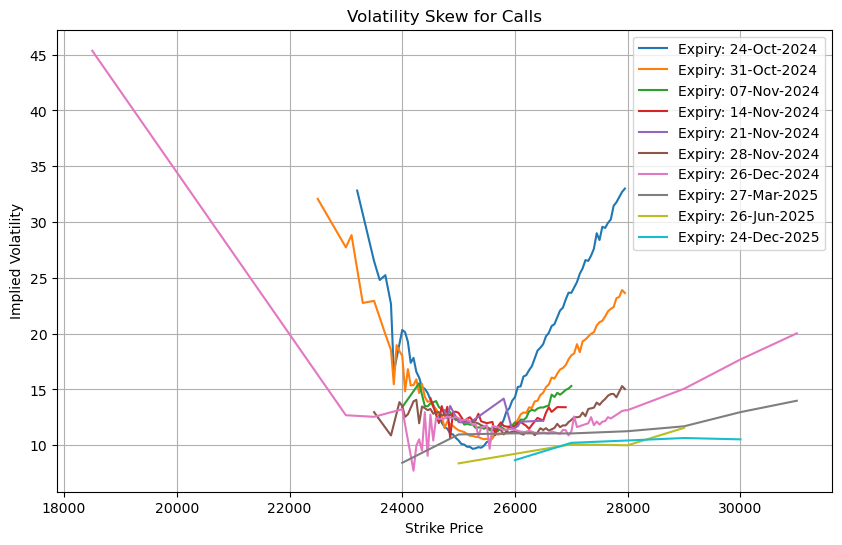

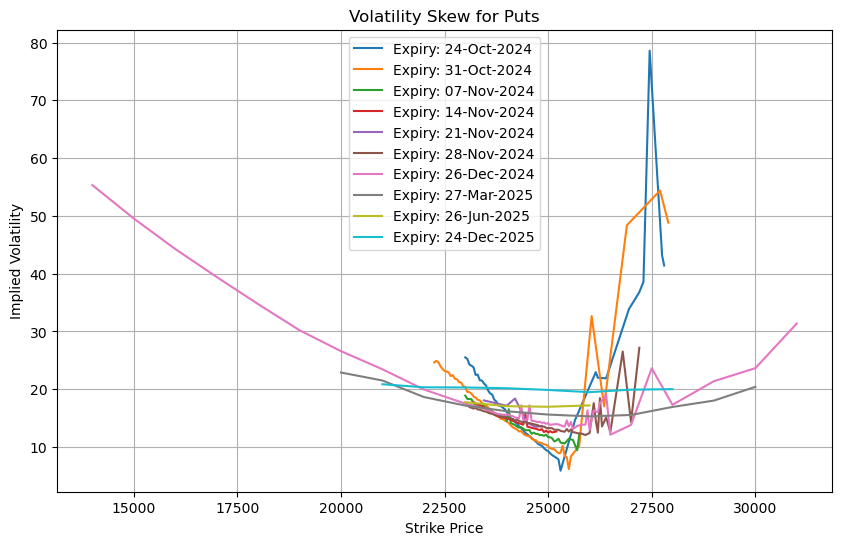

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os

# Function to fetch options data
def fetch_options_data(stock_symbol):
    session = requests.Session()
    
    url = f'https://www.nseindia.com/api/option-chain-indices?symbol={stock_symbol}'
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Referer': 'https://www.nseindia.com/',
        'X-Requested-With': 'XMLHttpRequest',
    }

    response = session.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        
        if 'records' in data and 'data' in data['records']:
            if len(data['records']['data']) > 0:
                calls_data = []
                puts_data = []

                for option in data['records']['data']:
                    strike_price = option['strikePrice']
                    expiry_date = option['expiryDate']
                    
                    if 'CE' in option:
                        calls_data.append({
                            'strikePrice': strike_price,
                            'expiryDate': expiry_date,
                            **option['CE']
                        })
                    
                    if 'PE' in option:
                        puts_data.append({
                            'strikePrice': strike_price,
                            'expiryDate': expiry_date,
                            **option['PE']
                        })
                
                calls_df = pd.DataFrame(calls_data) if calls_data else pd.DataFrame()
                puts_df = pd.DataFrame(puts_data) if puts_data else pd.DataFrame()

                return calls_df, puts_df
            else:
                print("No options data available for the specified symbol.")
                return None, None
        else:
            print("No 'records' or 'data' found in response.")
            return None, None
    else:
        print(f"Failed to retrieve data: {response.status_code} - {response.text}")
        return None, None

# Load baseline skew from CSV if it exists
def load_baseline_skew(filename):
    if os.path.exists(filename):
        return pd.read_csv(filename)
    return None

# Save baseline skew to CSV
def save_baseline_skew(baseline_skew, filename):
    baseline_skew.to_csv(filename, index=False)

# Function to calculate implied volatility skew with filtering out zero IVs
def calculate_volatility_skew(options_df):
    # Filter out rows where impliedVolatility is 0
    options_df_filtered = options_df[options_df['impliedVolatility'] > 0]
    return options_df_filtered[['strikePrice', 'expiryDate', 'impliedVolatility']]

# Function to plot volatility skew
def plot_volatility_skew(df, option_type):
    plt.figure(figsize=(10, 6))
    
    # Sort expiry dates from nearest to farthest
    sorted_expiry_dates = sorted(df['expiryDate'].unique(), key=pd.to_datetime)
    
    for expiry in sorted_expiry_dates:
        subset = df[df['expiryDate'] == expiry]
        plt.plot(subset['strikePrice'], subset['impliedVolatility'], label=f'Expiry: {expiry}')
    
    #for expiry in df['expiryDate'].unique():
        #subset = df[df['expiryDate'] == expiry]
        #plt.plot(subset['strikePrice'], subset['impliedVolatility'], label=f'Expiry: {expiry}')
    plt.title(f'Volatility Skew for {option_type}')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid()
    plt.show()

# Function to compare current and baseline skews
def compare_skews(baseline_skew, current_skew, threshold):
    significant_changes = []
    
    for strike in current_skew['strikePrice']:
        current_iv = current_skew[current_skew['strikePrice'] == strike]['impliedVolatility'].values[0]
        baseline_iv = baseline_skew[baseline_skew['strikePrice'] == strike]['impliedVolatility'].values[0]
        
        if abs(current_iv - baseline_iv) > threshold:
            significant_changes.append((strike, current_iv, baseline_iv))

    return significant_changes

# Function to alert significant changes
def alert_significant_changes(changes):
    for strike, current, baseline in changes:
        print(f"Alert: Significant change detected for strike {strike}. "
              f"Current IV: {current}, Baseline IV: {baseline}")

# Function to implement risk adjustments
def adjust_positions_based_on_changes(significant_changes):
    for strike, current_iv, baseline_iv in significant_changes:
        print(f"Considering adjustments for strike {strike}.")
        # Implement logic for hedging or reducing positions here

# Main execution logic
if __name__ == "__main__":
    stock_symbol = "NIFTY"
    baseline_calls_filename = "baseline_calls_skew.csv"
    baseline_puts_filename = "baseline_puts_skew.csv"

    # Load existing baseline skews for calls and puts
    baseline_calls = load_baseline_skew(baseline_calls_filename)
    baseline_puts = load_baseline_skew(baseline_puts_filename)
    
    # Fetch options data
    calls, puts = fetch_options_data(stock_symbol)

    if calls is not None and puts is not None:
        # Calculate skew for calls and puts, filtering out zero IVs
        calls_data = calculate_volatility_skew(calls)
        puts_data = calculate_volatility_skew(puts)

        # Plot skews
        plot_volatility_skew(calls_data, 'Calls')
        plot_volatility_skew(puts_data, 'Puts')

        # Compare skews if baseline exists
        if baseline_calls is not None and baseline_puts is not None:
            # Set a threshold for significant changes
            threshold = 0.05  # Example: 5%

            # Compare skews
            significant_call_changes = compare_skews(baseline_calls, calls_data, threshold)
            significant_put_changes = compare_skews(baseline_puts, puts_data, threshold)

            # Alert for significant changes
            alert_significant_changes(significant_call_changes)
            alert_significant_changes(significant_put_changes)

            # Adjust positions based on changes
            if significant_call_changes or significant_put_changes:
                adjust_positions_based_on_changes(significant_call_changes)
                adjust_positions_based_on_changes(significant_put_changes)

        # Save the current skews as the new baseline
        save_baseline_skew(calls_data, baseline_calls_filename)
        save_baseline_skew(puts_data, baseline_puts_filename)
